# Retrieving Spectra from a Database [v1.0]

In [1]:
%matplotlib inline

In [2]:
# imports
from astropy import units as u
from astropy.coordinates import SkyCoord

import specdb
from specdb.specdb import SpecDB
from specdb import specdb as spdb_spdb

## Setup

In [15]:
db_file = specdb.__path__[0]+'/tests/files/IGMspec_DB_v02_debug.hdf5'
reload(spdb_spdb)
sdb = spdb_spdb.SpecDB(db_file=db_file)

Database is igmspec
Created on 2017-Jan-07


## Spectra from a Meta data Query
    Returned spectra in the XSpectrum1D object are aligned to the Table

### Perform meta query

In [4]:
meta = sdb.meta_from_position((0.0019,17.7737), 1*u.arcsec)
meta

Your search yielded 1 match[es] within radius=1 arcsec


SDSS_NAME,RA_GROUP,DEC_GROUP,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,DATE-OBS,R,zem_GROUP,sig_zem,flag_zem,STYPE,IGM_ID,SPEC_FILE,NPIX,WV_MIN,WV_MAX,GROUP_ID,EPOCH,CAT,INSTR,DISPERSER,TELESCOPE,GROUP
str18,float64,float64,int32,int32,int32,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,int32,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64,str10,float64,float64,float64,str9,str3,int64,str28,int64,float64,float64,int64,float64,str5,str4,str4,str10,str9
000000.45+174625.4,0.0019,17.7737,268514930,6173,56238,528,2.30909729004,2.30909729004,0.000943339022342,0,2.30763868197,-1.0,0.346182279084,2.31230791362,2.30638494927,2.3046866469,0,2199023796224,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0,-1,-1,-1,0,0.537336213179,0.779484925454,-1.0 .. -1.0,0.58568293642,0.915501904005,-1.0,4278.7900341,1595.2886496,2683.5013845,2.15328741853,44.0028643812,1.40097166147,3575.00108901,1554.12165803,2020.87943097,0.706666936497,38.4285671721,15.8517240349,7996.40388327,4579.19012749,3417.21375578,0.223279535625,69.3860000703,17.8808108042,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7713,54741,301,4,231,1237678601842131080,1.03847694397 .. 2.65843176842,12.3596630096 .. 0.852828204632,22.4397926331 .. 21.3626842499,0.28713452816 .. 0.386405169964,1.03847694397 .. 2.65843176842,-23.882931269,-0.0820910409093,0.146194890141 .. 0.0419441759586,0.113614 .. 0.0338511,21.9297126138,0,0.0,0.0,0.0,

### Retrieve spectra

In [5]:
spec = sdb.spectra_from_meta(meta)

Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:248: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


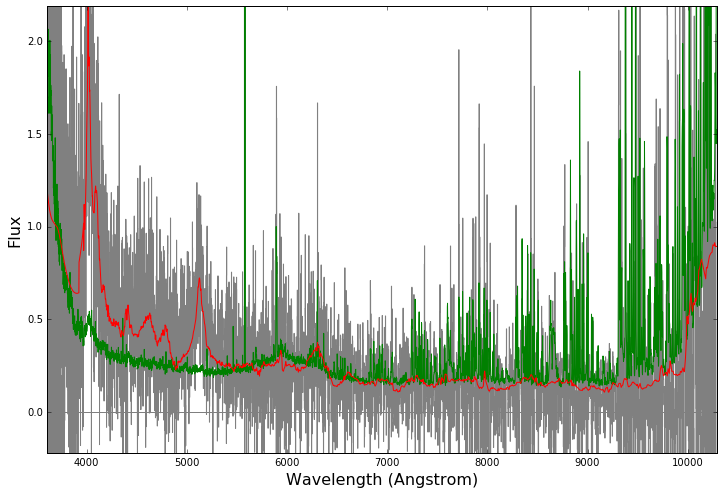

In [6]:
spec.plot(inline=True)

### Multiple spectra for a single source

In [7]:
meta = sdb.meta_from_position('001115.23+144601.8', 1*u.arcsec)
spec = sdb.spectra_from_meta(meta)
print('Nspec = {:d}'.format(spec.nspec))
spec

Your search yielded 1 match[es] within radius=1 arcsec
Staged 2 spectra totalling 6.4e-05 Gb
Loaded spectra
Nspec = 2


<XSpectrum1D: file=none, nspec=2, select=0, wvmin=4911.03 Angstrom, wvmax=7831.05 Angstrom>

## Spectra for a Single Source
    Performs the meta query and retrieves spectra in one call
    Default tolerance on position is 0.5 arcseconds

### Repeat of multiple spectra request from above

In [8]:
spec, meta = sdb.spectra_from_coord('001115.23+144601.8')

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 2 spectra totalling 6.4e-05 Gb
Loaded spectra


In [9]:
meta[['SDSSJ','RA_GROUP','DEC_GROUP','GROUP_ID', 'GROUP', 'IGM_ID', 'DISPERSER']]

SDSSJ,RA_GROUP,DEC_GROUP,GROUP_ID,GROUP,IGM_ID,DISPERSER
str31,float64,float64,int64,str3,int64,str4
001115.23+144601.8,2.8135,14.7672,0,GGG,3244,B600
001115.23+144601.8,2.8135,14.7672,163,GGG,3244,R400


### One can restrict by group or meta data as in a Meta data Query
    Note: The query is performed on both the source catalog and the meta data in each group

In [10]:
qdict = dict(DISPERSER='R400')
spec, meta = sdb.spectra_from_coord('001115.23+144601.8', query_dict=qdict)
meta[['SDSSJ','RA_GROUP','DEC_GROUP','GROUP_ID', 'GROUP', 'IGM_ID', 'DISPERSER']]

Key DISPERSER in query_dict is not present in Table catalog
Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 3.2e-05 Gb
Loaded spectra


SDSSJ,RA_GROUP,DEC_GROUP,GROUP_ID,GROUP,IGM_ID,DISPERSER
str31,float64,float64,int64,str3,int64,str4
001115.23+144601.8,2.8135,14.7672,163,GGG,3244,R400


### If multiple sources are match to the input coordiantes (e.g. by increasing the tolerance), only the closest is taken

In [11]:
spec, meta = sdb.spectra_from_coord((0.0019, 17.7737), tol=10*u.deg)
len(meta)

Your search yielded 5 match[es] within radius=10 deg
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra


1

### Using the IDKEY instead

In [13]:
spec, meta = sdb.spectra_from_ID(3244)
meta[['SDSSJ','RA_GROUP','DEC_GROUP','GROUP_ID', 'GROUP', 'IGM_ID', 'DISPERSER']]

Staged 2 spectra totalling 6.4e-05 Gb
Loaded spectra


SDSSJ,RA_GROUP,DEC_GROUP,GROUP_ID,GROUP,IGM_ID,DISPERSER
str31,float64,float64,int64,str3,int64,str4
001115.23+144601.8,2.8135,14.7672,0,GGG,3244,B600
001115.23+144601.8,2.8135,14.7672,163,GGG,3244,R400


## Spectra from an input set of Coordinates in a group
    This is only allowed for one group at a time.
    It is risky in that only the first spectrum identified for each source is returned.
    And it requires that *all* of the coordinates be found in the group.

### Here is a example where each source has only 1 spectrum in the group

In [16]:
coords = SkyCoord(ra=[0.0028, 0.0019], dec=[14.9747, 17.77374], unit='deg')
spec, meta = sdb.spectra_in_group(coords, 'BOSS_DR12')
spec

Your search yielded 2 matches from 2 input coordinates
Staged 2 spectra totalling 0.000186 Gb
Loaded spectra


<XSpectrum1D: file=none, nspec=2, select=0, wvmin=3605.79 Angstrom, wvmax=10287.3 Angstrom>

### Here is an example where each source has 2 spectra.  
    Only the first found is returned. 
    In this case, the B600 grating.

In [20]:
coords = SkyCoord(ra=[2.8135,16.5802], dec=[14.7672, 0.8065], unit='deg')
spec, meta = sdb.spectra_in_group(coords, 'GGG')
print("Nspec = {:d}".format(spec.nspec))
meta[['SDSSJ','RA_GROUP','DEC_GROUP','GROUP_ID', 'GROUP', 'IGM_ID', 'DISPERSER']]

Your search yielded 2 matches from 2 input coordinates
Staged 2 spectra totalling 6.4e-05 Gb
Loaded spectra
Nspec = 2


SDSSJ,RA_GROUP,DEC_GROUP,GROUP_ID,GROUP,IGM_ID,DISPERSER
str31,float64,float64,int64,str3,int64,str4
001115.23+144601.8,2.813485,14.767169,0,GGG,3244,B600
010619.24+004823.3,16.580172,0.806478,2,GGG,17656,B600


### Now we request the other grating

In [21]:
qdict = dict(DISPERSER='R400')
spec, meta = sdb.spectra_in_group(coords, 'GGG', query_dict=qdict)
meta[['SDSSJ','RA_GROUP','DEC_GROUP','GROUP_ID', 'GROUP', 'IGM_ID', 'DISPERSER']]

Key DISPERSER in query_dict is not present in Table catalog
Your search yielded 2 matches from 2 input coordinates
Key flag_group in query_dict is not present in Table meta data
Key flag_group in query_dict is not present in Table meta data
Staged 2 spectra totalling 6.4e-05 Gb
Loaded spectra


SDSSJ,RA_GROUP,DEC_GROUP,GROUP_ID,GROUP,IGM_ID,DISPERSER
str31,float64,float64,int64,str3,int64,str4
001115.23+144601.8,2.813485,14.767169,163,GGG,3244,R400
010619.24+004823.3,16.580172,0.806478,165,GGG,17656,R400
